<font size='9'> Time Series

<font size='5'>Hongyi Zhang

In [2]:
## Author: Hongyi Zhang
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

df=pd.read_csv("C:\\Users\\zhy92\\Desktop\\Stevens Master\\Classes\\2020 Spring\\MA -641-A Time Series Analysis I\\Final\\weather_train.csv",parse_dates=['timestamp'], index_col='timestamp')

df=df.drop(['site_id'],axis=1)

df.head()

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139773 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 7 columns):
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7)
memory usage: 8.5 MB


<font size='8'> I fill the nan value with overall mean of the column

In [4]:
df['air_temperature'].fillna(df['air_temperature'].mean(),inplace=True)
df['cloud_coverage'].fillna(df['cloud_coverage'].mean(),inplace=True)
df['dew_temperature'].fillna(df['dew_temperature'].mean(),inplace=True)
df['precip_depth_1_hr'].fillna(df['precip_depth_1_hr'].mean(),inplace=True)
df['sea_level_pressure'].fillna(df['sea_level_pressure'].mean(),inplace=True)
df['wind_direction'].fillna(df['wind_direction'].mean(),inplace=True)
df['wind_speed'].fillna(df['wind_speed'].mean(),inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139773 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 7 columns):
air_temperature       139773 non-null float64
cloud_coverage        139773 non-null float64
dew_temperature       139773 non-null float64
precip_depth_1_hr     139773 non-null float64
sea_level_pressure    139773 non-null float64
wind_direction        139773 non-null float64
wind_speed            139773 non-null float64
dtypes: float64(7)
memory usage: 8.5 MB


<font size='6'> Too many data, short it down, and plot the graphs

In [6]:
df_top=df.head(5000)
df_top

,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,25.0,6.000000,20.0,0.983047,1019.7,0.0,0.0
2016-01-01 01:00:00,24.4,2.149306,21.1,-1.000000,1020.2,70.0,1.5
2016-01-01 02:00:00,22.8,2.000000,21.1,0.000000,1020.2,0.0,0.0
2016-01-01 03:00:00,21.1,2.000000,20.6,0.000000,1020.1,0.0,0.0
2016-01-01 04:00:00,20.0,2.000000,20.0,-1.000000,1020.0,250.0,2.6
...,...,...,...,...,...,...,...
2016-07-27 03:00:00,27.8,2.000000,23.3,0.000000,1018.4,140.0,3.1
2016-07-27 04:00:00,27.2,2.000000,22.8,0.000000,1018.8,150.0,2.6
2016-07-27 05:00:00,26.7,2.000000,23.3,0.000000,1018.9,170.0,1.5


<font size='9'> Visualize first

Solving environment: ...working... done

# All requested packages already installed.



TypeError: invalid type promotion

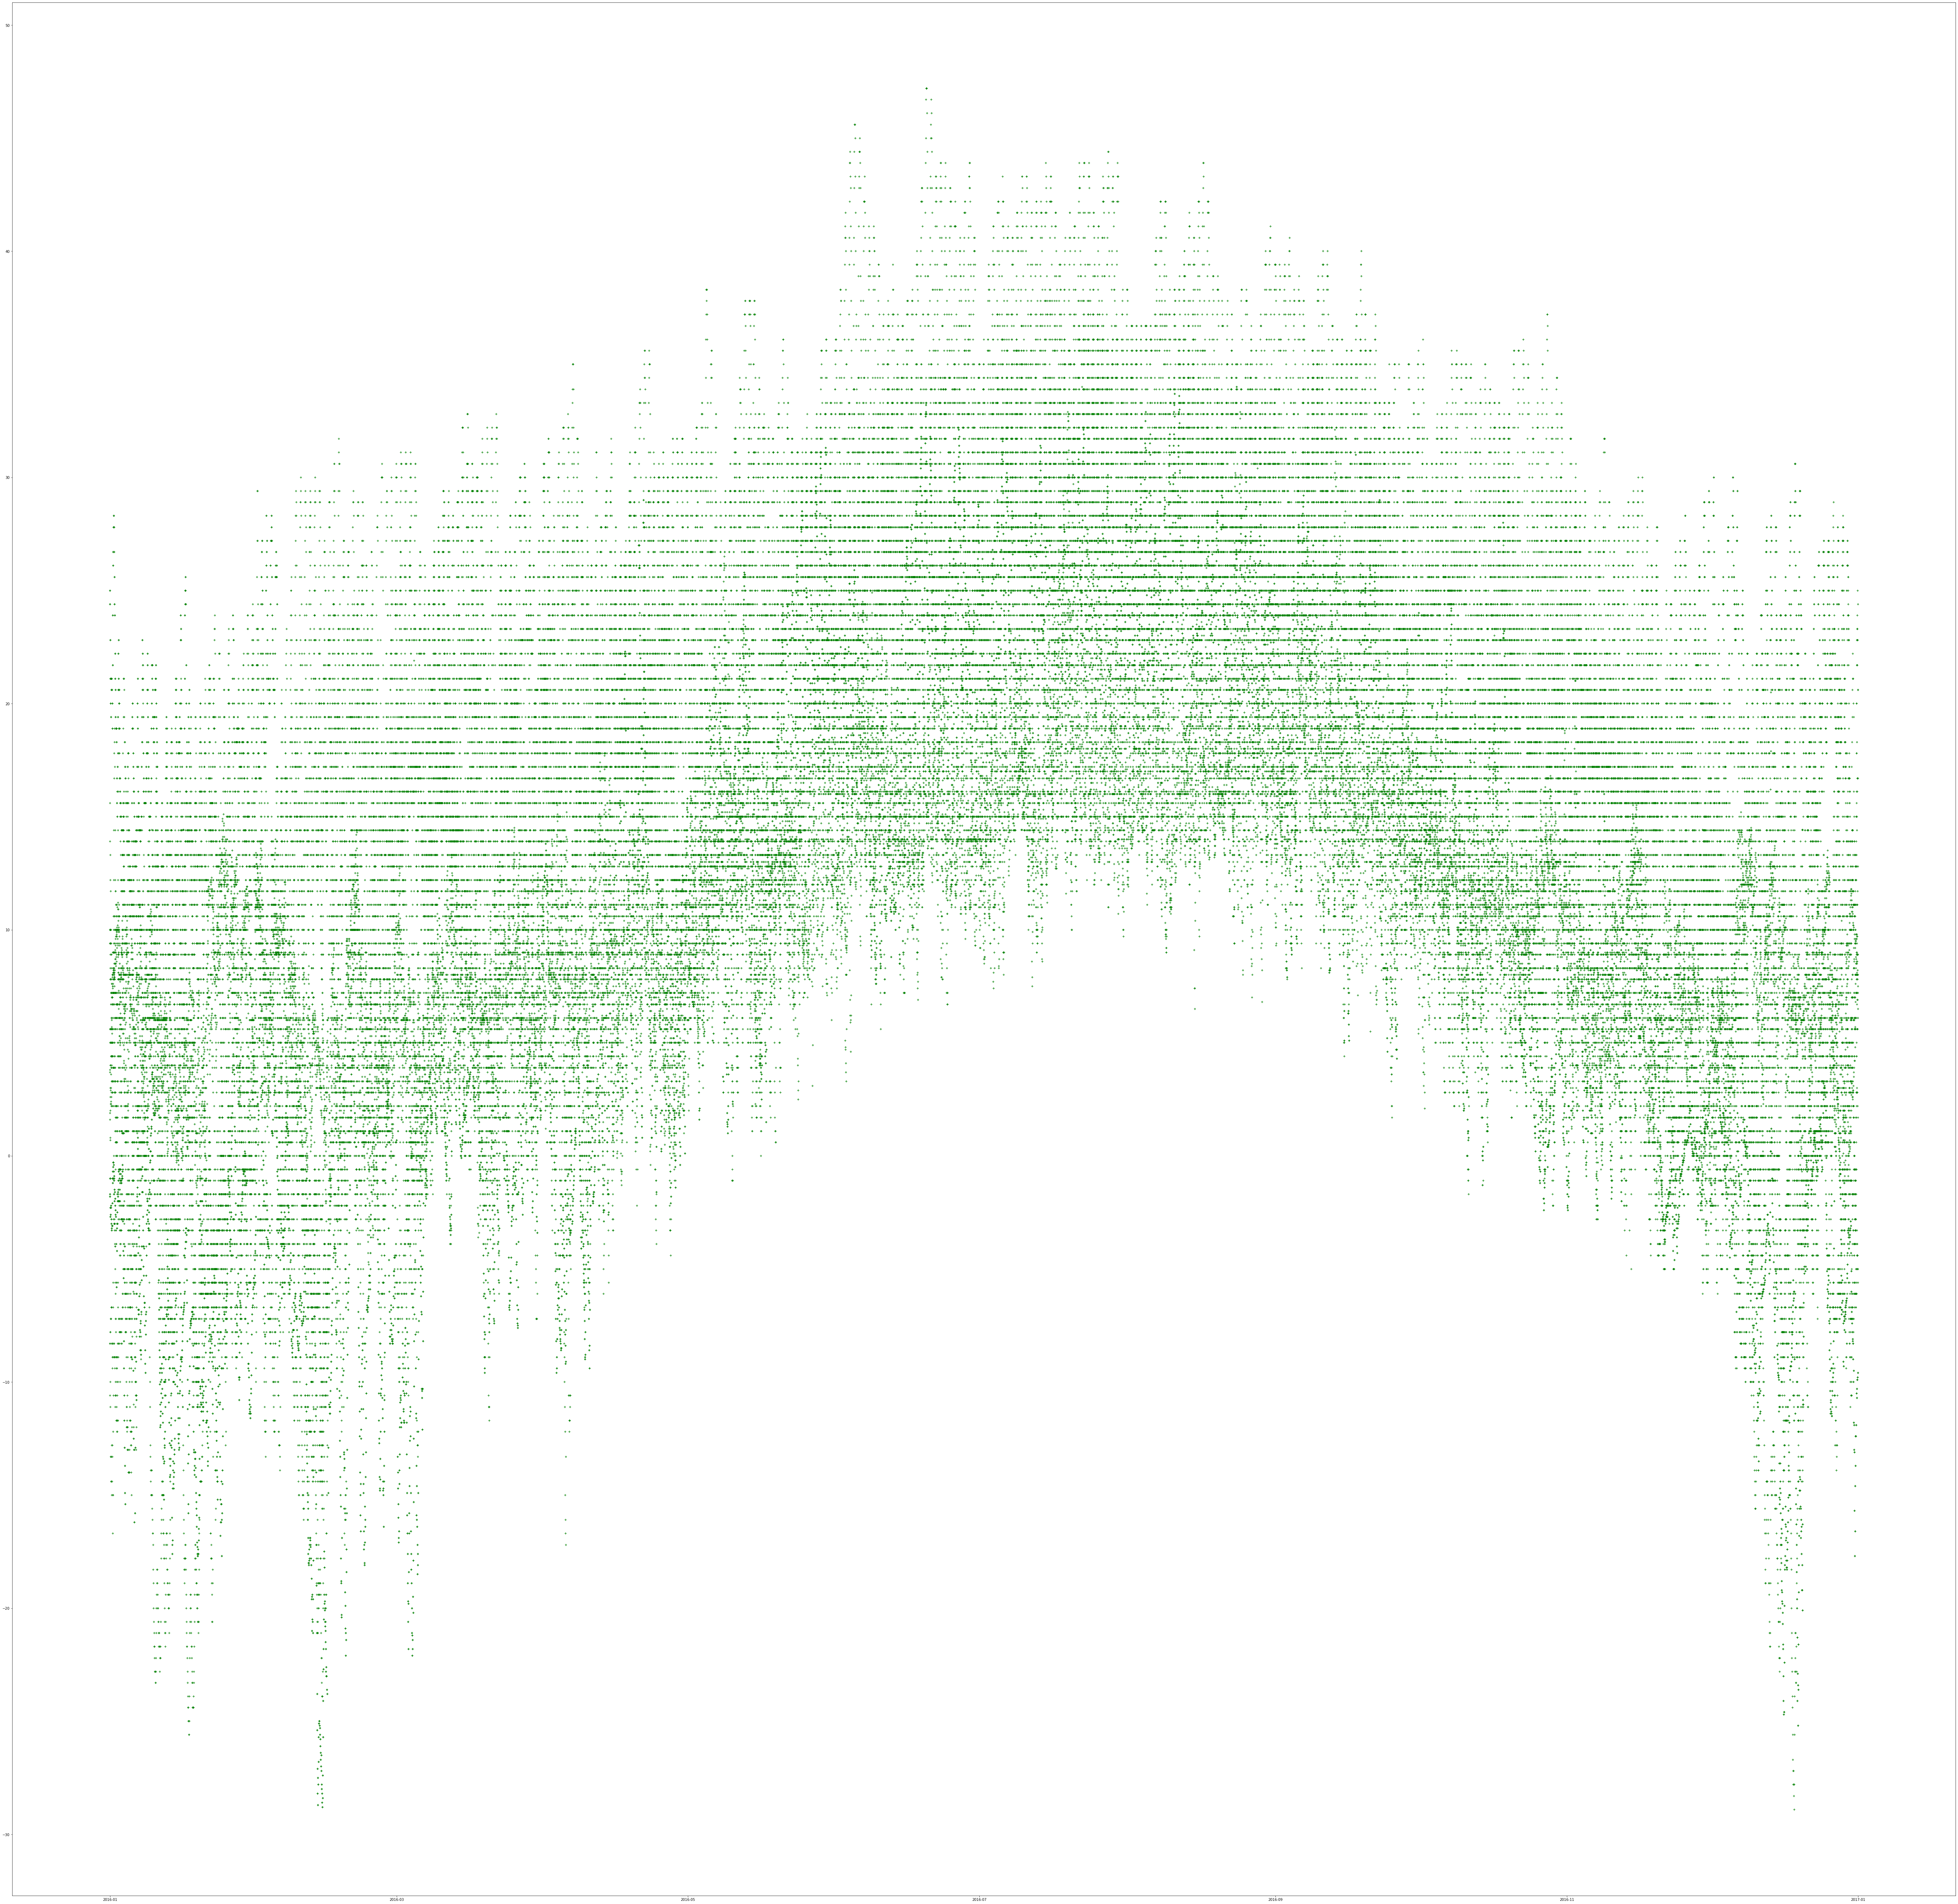

In [18]:
!conda install -c anaconda seaborn --yes
import seaborn as sns
plt.figure(figsize=(100, 100))
ax = sns.regplot(x=df.index, y='air_temperature', data=df, color='green', marker='+')

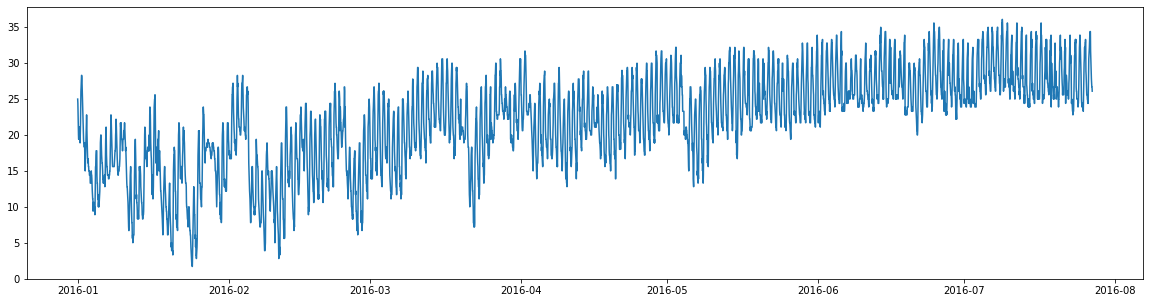

In [9]:
import matplotlib.pyplot as plt
def plot (y):
    plt.rcParams.update({'figure.figsize': (20,5)})
    plt.plot(df_top.index,y)
    plt.show()
    
plot(df_top['air_temperature'])

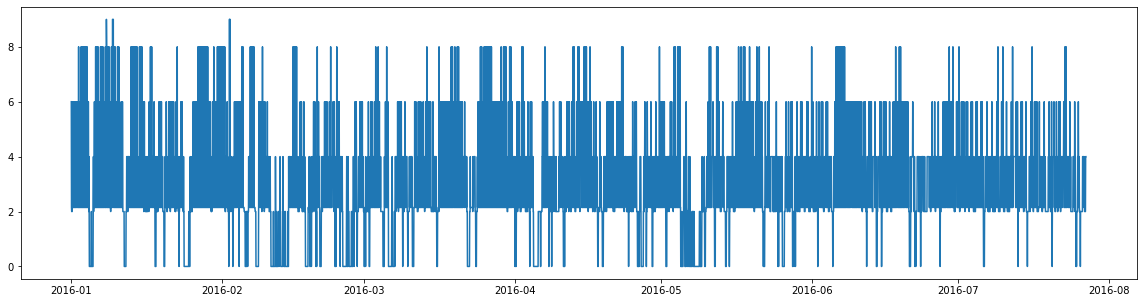

In [43]:
plot(df_top['cloud_coverage'])

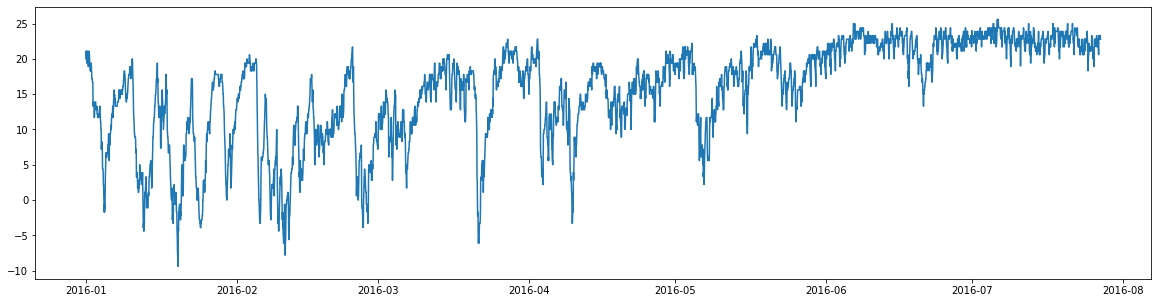

In [44]:
plot(df_top['dew_temperature'])

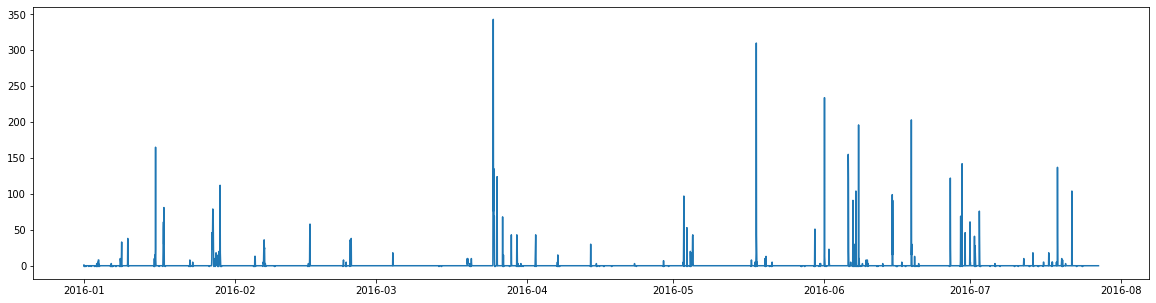

In [45]:
plot(df_top['precip_depth_1_hr'])

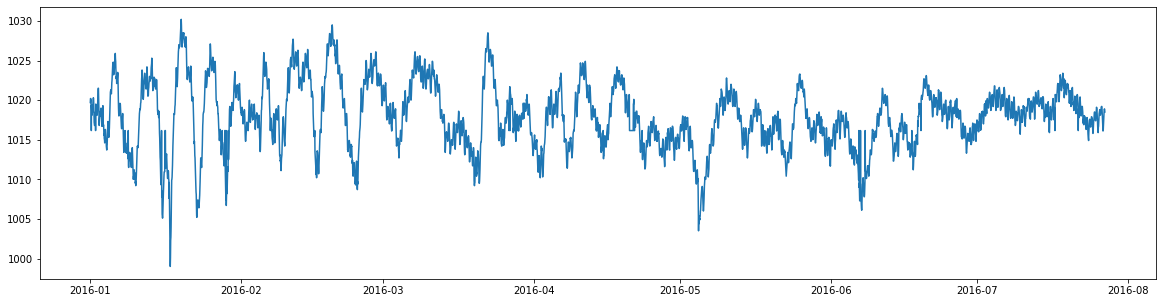

In [46]:
plot(df_top['sea_level_pressure'])

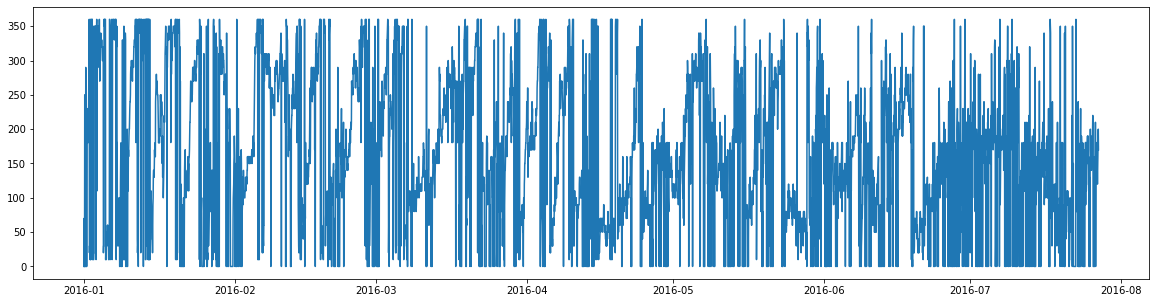

In [47]:
plot(df_top['wind_direction'])

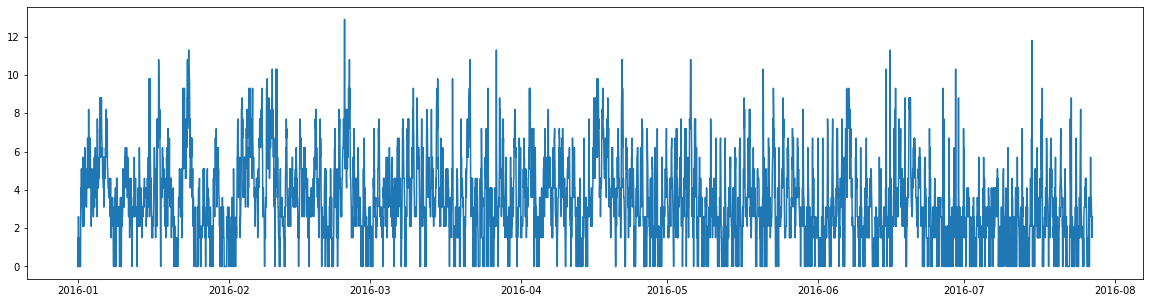

In [48]:
plot(df_top['wind_speed'])

<font size='9'> Take a look at 'air_temperature' and decompose it

In [29]:
df_temp=df[['air_temperature']]
df_temp=df_temp.head(2000)

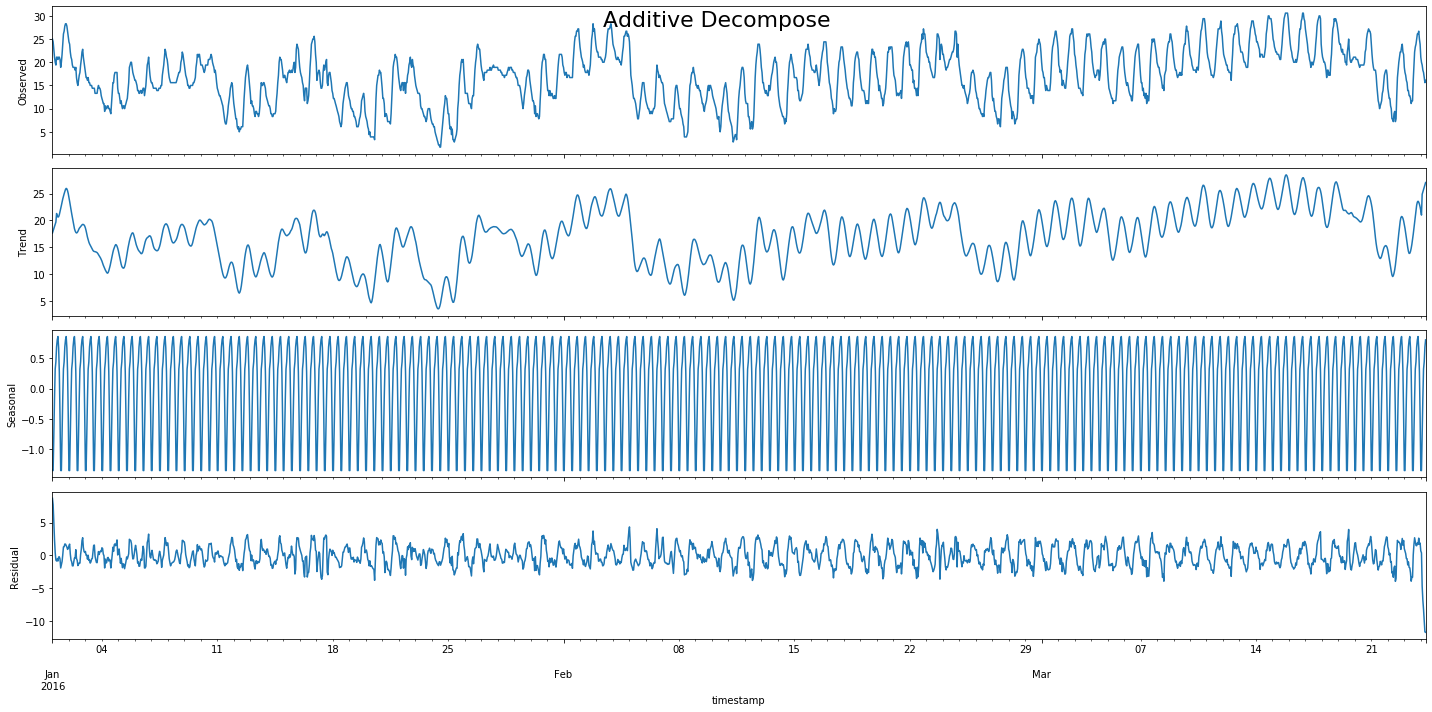

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df_temp['air_temperature'],model='additive',freq=12,extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (20,10)})
decomp.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

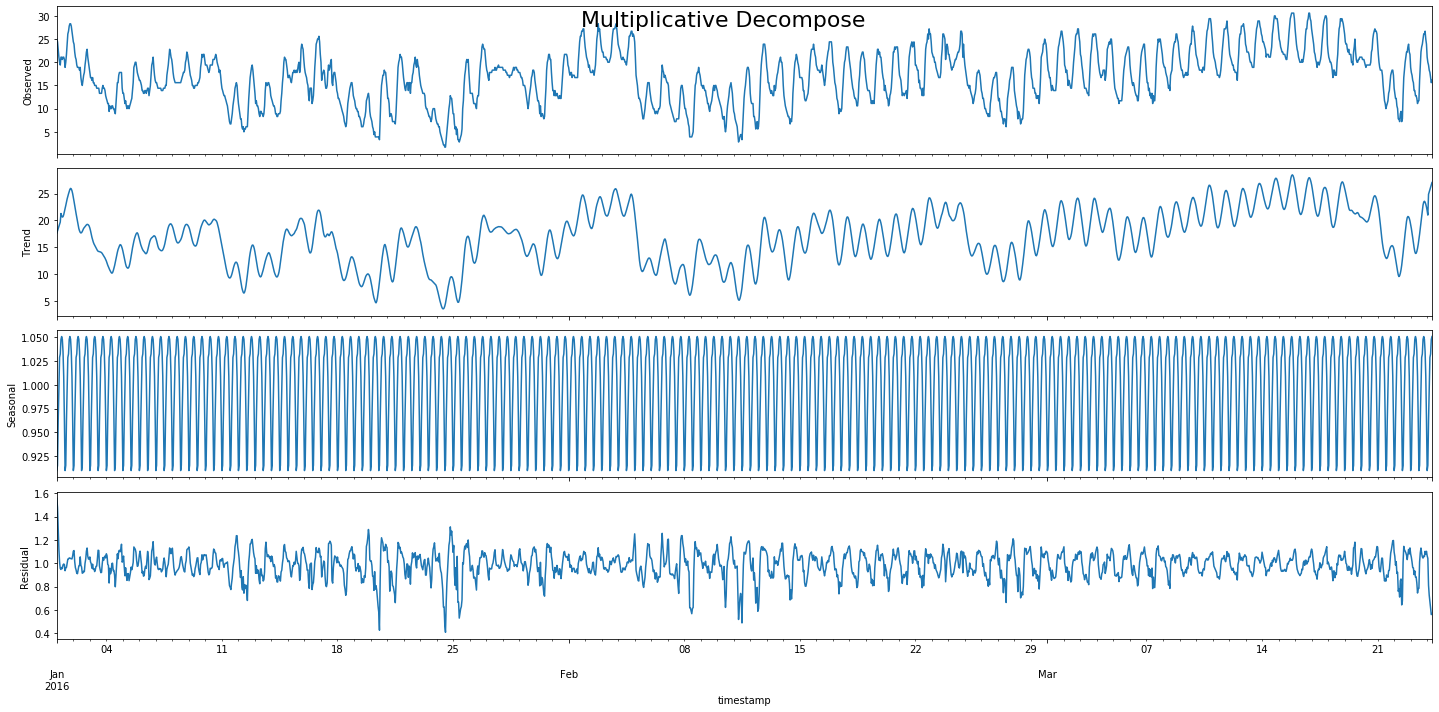

In [31]:
result_mul=seasonal_decompose(df_temp['air_temperature'],model='mutiplicative',freq=12,extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (20,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
plt.show()

<font size='7'> Test for stationary

In [32]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='ct')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
         kpss_output['Critical Value (%s)'%key] = value
    return kpss_output

kpss_test(df_temp['air_temperature'])

Results of KPSS Test:


C:\Users\zhy92\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\zhy92\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Test Statistic            0.258474
p-value                   0.010000
Lags Used                26.000000
Critical Value (10%)      0.119000
Critical Value (5%)       0.146000
Critical Value (2.5%)     0.176000
Critical Value (1%)       0.216000
dtype: float64

<font size='5'>Reject null hypthesis, it is not stationary

<font size='9'> Acf and Pacf

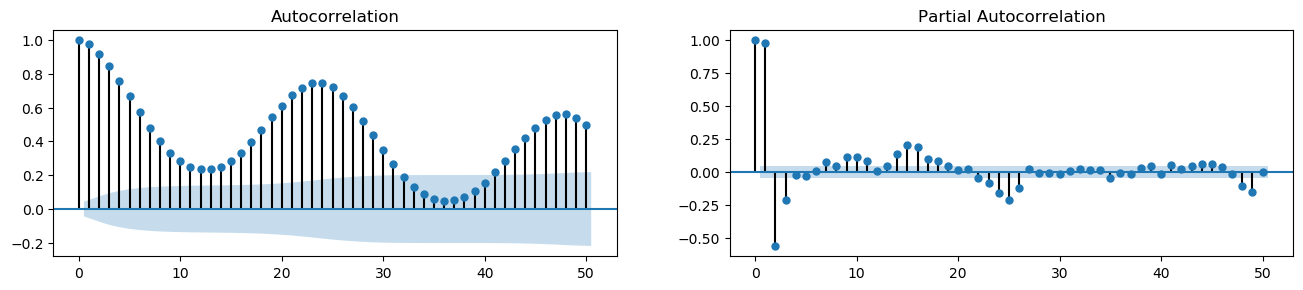

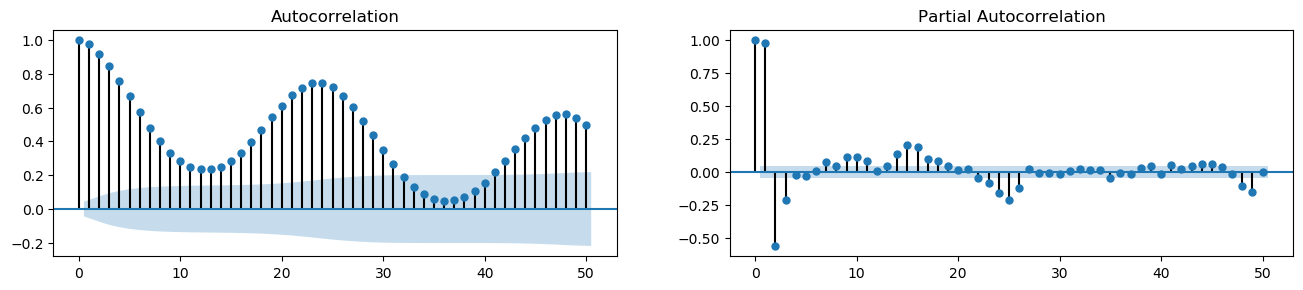

In [33]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_temp['air_temperature'].tolist(), lags=50, ax=axes[0])
plot_pacf(df_temp['air_temperature'].tolist(), lags=50, ax=axes[1])

<font size='3'>Notes:  
Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

<font size='9'> Lag plot

Text(0.5, 1.15, 'Lag Plots of air_temp \n(Points get concentrated with increasing lag -> more correlation)\n')

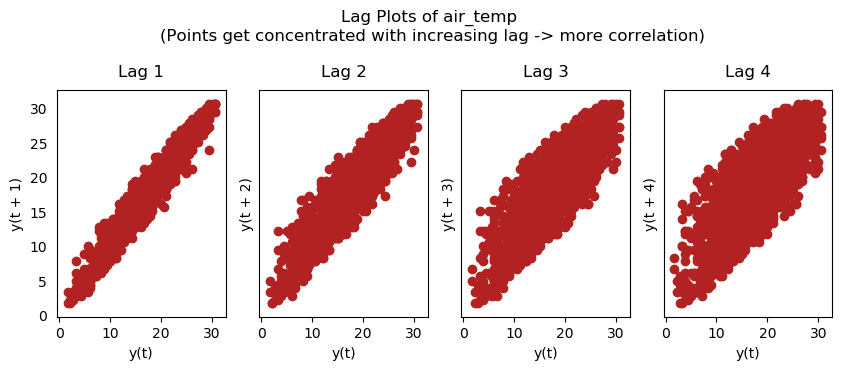

In [27]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_temp['air_temperature'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of air_temp \n(Points get concentrated with increasing lag -> more correlation)\n', y=1.15)    

